In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pipe (1).csv')

In [ ]:
df.isnull().sum()

material              0
tomr                  0
cf                    0
c_wave_no             0
cd_radial             0
cw_circumferencial    0
crack                 0
dtype: int64

In [ ]:
df.shape

(1941, 7)

<Axes: >

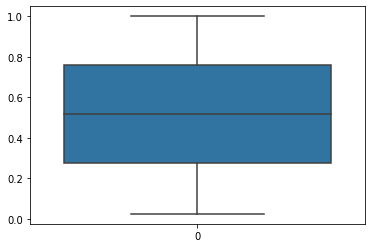

In [ ]:
sns.boxplot(data = df['tomr'])


<Axes: >

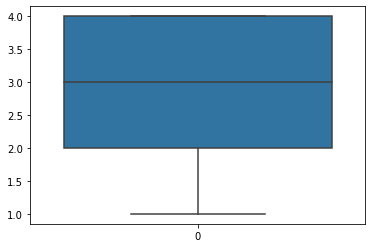

In [ ]:
sns.boxplot(data = df['cf'])


<Axes: >

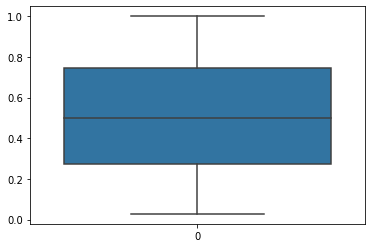

In [ ]:
sns.boxplot(data = df['cd_radial'])


<Axes: >

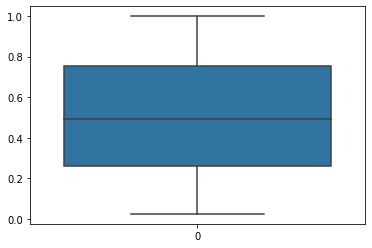

In [ ]:
sns.boxplot(data = df['cw_circumferencial'])


<Axes: >

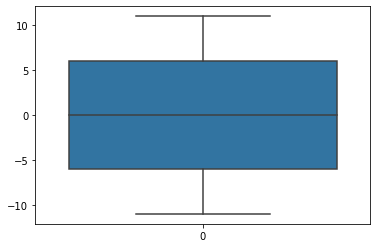

In [ ]:
sns.boxplot(data = df['c_wave_no'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
X = df[['material','tomr','cf','c_wave_no','cd_radial','cw_circumferencial']]
y = df['crack']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1358, 6), (583, 6), (1358,), (583,))

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='entropy',max_depth=4))

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

In [ ]:
pipeline.score(X_train,y_train),pipeline.score(X_test,y_test)

(0.7547864506627393, 0.7478559176672385)

In [ ]:
pipeline=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='entropy',max_depth=4))

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgclf=BaggingClassifier(base_estimator=pipeline,n_estimators=100,max_samples=10,random_state=1,n_jobs=5)

In [ ]:
bgclf.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('decisiontreeclassifier',
                                                  DecisionTreeClassifier(criterion='entropy',
                                                                         max_depth=4))]),
                  max_samples=10, n_estimators=100, n_jobs=5, random_state=1)

In [ ]:
bgclf.score(X_train,y_train),bgclf.score(X_test,y_test)

(0.7172312223858616, 0.7358490566037735)

In [ ]:
y_train_pred=bgclf.predict(X_train)
y_test_pred=bgclf.predict(X_test)
y_test_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

[[121 109]
 [275 853]]


<Axes: >

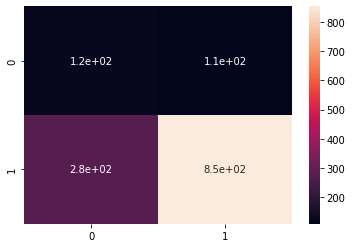

In [ ]:
cm_train=metrics.confusion_matrix(y_train_pred,y_train)
print(cm_train)
sns.heatmap(cm_train,annot=True)

[[ 59  55]
 [ 99 370]]


<Axes: >

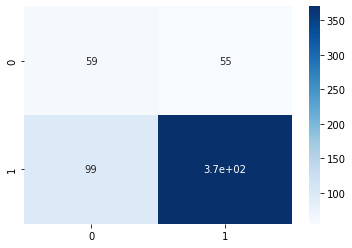

In [ ]:
cm_test=metrics.confusion_matrix(y_test_pred,y_test)
print(cm_test)
sns.heatmap(cm_test,annot=True,cmap='Blues')

In [ ]:
metrics.accuracy_score(y_test_pred,y_test)

0.7358490566037735

In [ ]:
cr = classification_report(y_test_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.37      0.52      0.43       114
           1       0.87      0.79      0.83       469

    accuracy                           0.74       583
   macro avg       0.62      0.65      0.63       583
weighted avg       0.77      0.74      0.75       583



In [ ]:
x_new = 